In [5]:
def split_rectangle(rectangle):
    # Calculate total height of the original rectangle
    total_height = rectangle[2][0] - rectangle[0][0]
    
    # Calculate height for each sub-rectangle
    sub_height = total_height / 3
    
    rectangles = []
    for i in range(3):
        # Calculate the vertices for each sub-rectangle
        upper_left = [rectangle[0][0] + i * sub_height, rectangle[0][1]]
        upper_right = [rectangle[0][0] + i * sub_height, rectangle[1][1]]
        lower_left = [rectangle[0][0] + (i + 1) * sub_height, rectangle[0][1]]
        lower_right = [rectangle[0][0] + (i + 1) * sub_height, rectangle[1][1]]
        
        # Append the vertices of the sub-rectangle to the list
        rectangles.append([upper_left, upper_right, lower_right, lower_left])
    
    return rectangles

# Given rectangle
original_rectangle = [[33.947557, -84.739562], [33.947557, -84.374550], [34.079128, -84.739562], [34.079128, -84.374550]]

# Split the rectangle into 3 sub-rectangles
sub_rectangles = split_rectangle(original_rectangle)

# Output the sub-rectangles in the desired format
for i, rect in enumerate(sub_rectangles):
    print(f"Sub-rectangle {i+1}: {rect}")


Sub-rectangle 1: [[33.947557, -84.739562], [33.947557, -84.37455], [33.991414, -84.37455], [33.991414, -84.739562]]
Sub-rectangle 2: [[33.991414, -84.739562], [33.991414, -84.37455], [34.035271, -84.37455], [34.035271, -84.739562]]
Sub-rectangle 3: [[34.035271, -84.739562], [34.035271, -84.37455], [34.079128, -84.37455], [34.079128, -84.739562]]


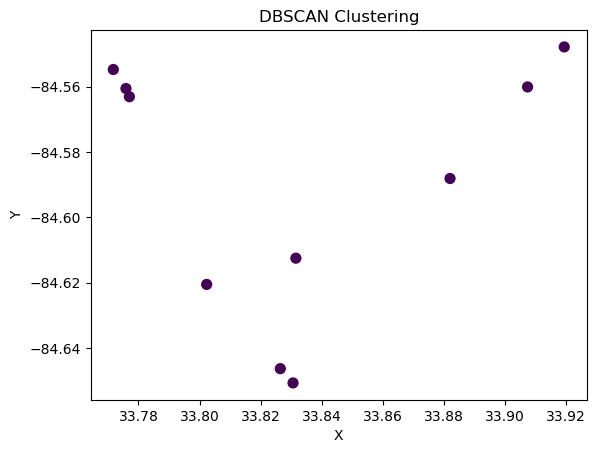

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def cluster_and_plot(data, eps):
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)

    # Run DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)

    # Plot the clusters
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('DBSCAN Clustering')
    plt.show()

# Load the CSV file into a DataFrame
df = pd.read_csv('CleanedDataCobb.csv')

# Filter points with "Kennesaw" in the "Name" column
cleaned = df[df['Name'].str.contains('Austell')]
cleaned = cleaned.drop_duplicates(subset=['Name', 'Label'])
# Extract the X and Y columns
X = cleaned[['X', 'Y']].values

# Call the function to cluster and plot
cluster_and_plot(X, 0.3)


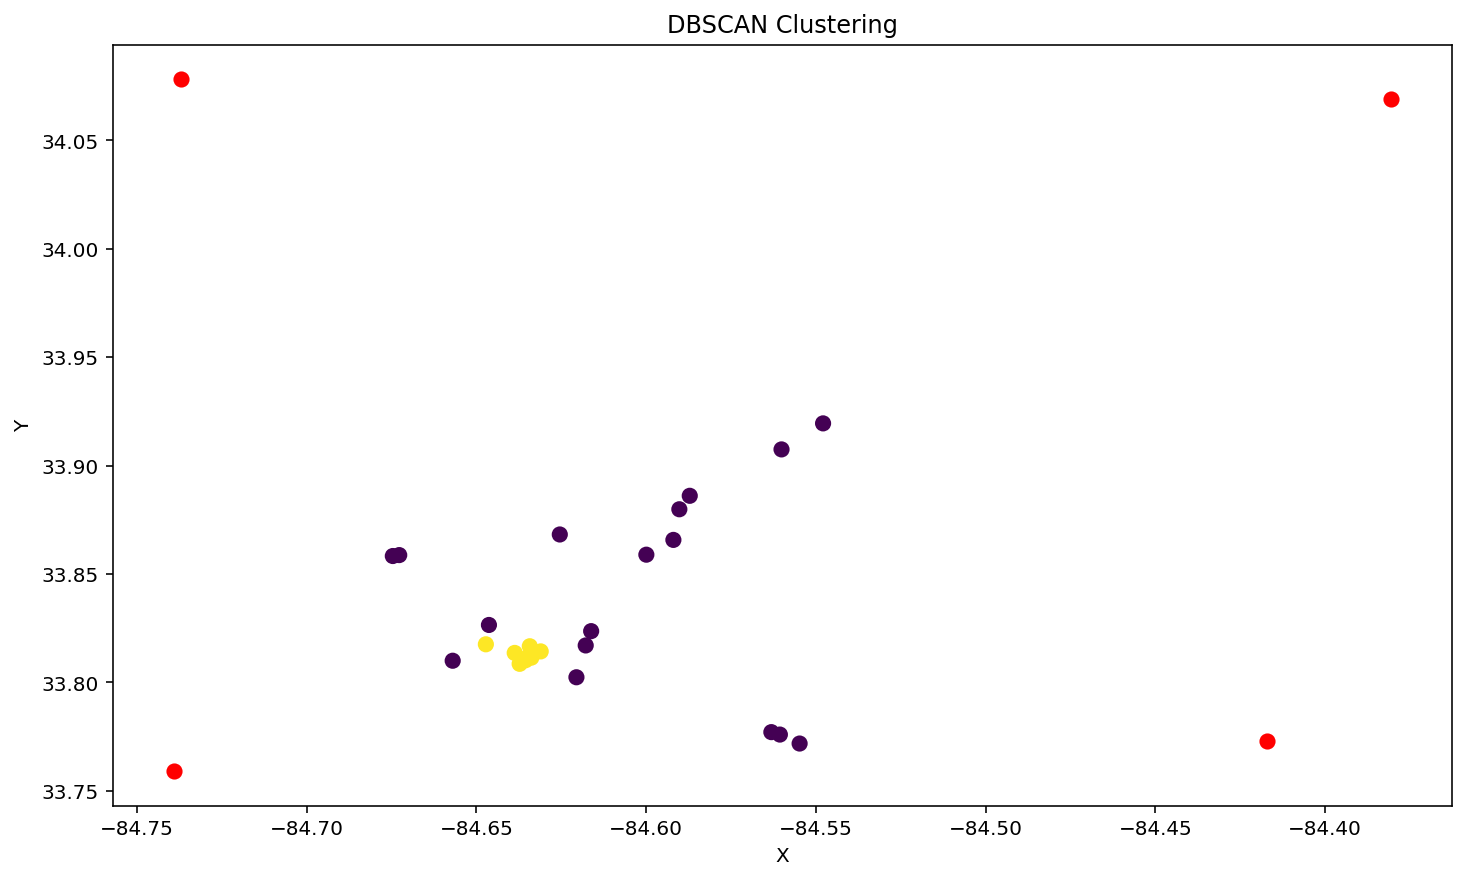

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def cluster_and_plot(data, eps):
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data)

    # Run DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)

    # Manually specified additional points
    additional_points = np.array([[34.078195, -84.737098],
                                  [33.759108, -84.739158],
                                  [33.772771, -84.417076],
                                  [34.069045, -84.380571]])

    # Plot the clusters with additional points
    plt.scatter(data[:, 1], data[:, 0], c=labels, cmap='viridis', s=50)  # X and Y switched
    plt.scatter(additional_points[:, 1], additional_points[:, 0], color='red', s=50)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('DBSCAN Clustering')
    plt.show()

# Load the CSV file into a DataFrame
df = pd.read_csv('CleanedDataCobb.csv')

# Filter points with "Kennesaw" in the "Name" column
cleaned = df[df['Name'].str.contains('Austell')]
cleaned = cleaned.drop_duplicates(subset=['Name', 'Label'])

# Extract the X and Y columns
X = cleaned[['X', 'Y']].values

# Additional points
additional_points = np.array([[34.078195, -84.737098],
                              [33.759108, -84.739158],
                              [33.772771, -84.417076],
                              [34.069045, -84.380571]])

# Convert additional points to a DataFrame and concatenate with the original DataFrame
additional_df = pd.DataFrame(additional_points, columns=['X', 'Y'])
df = pd.concat([df, additional_df], ignore_index=True)

# Call the function to cluster and plot
cluster_and_plot(X, 0.3)


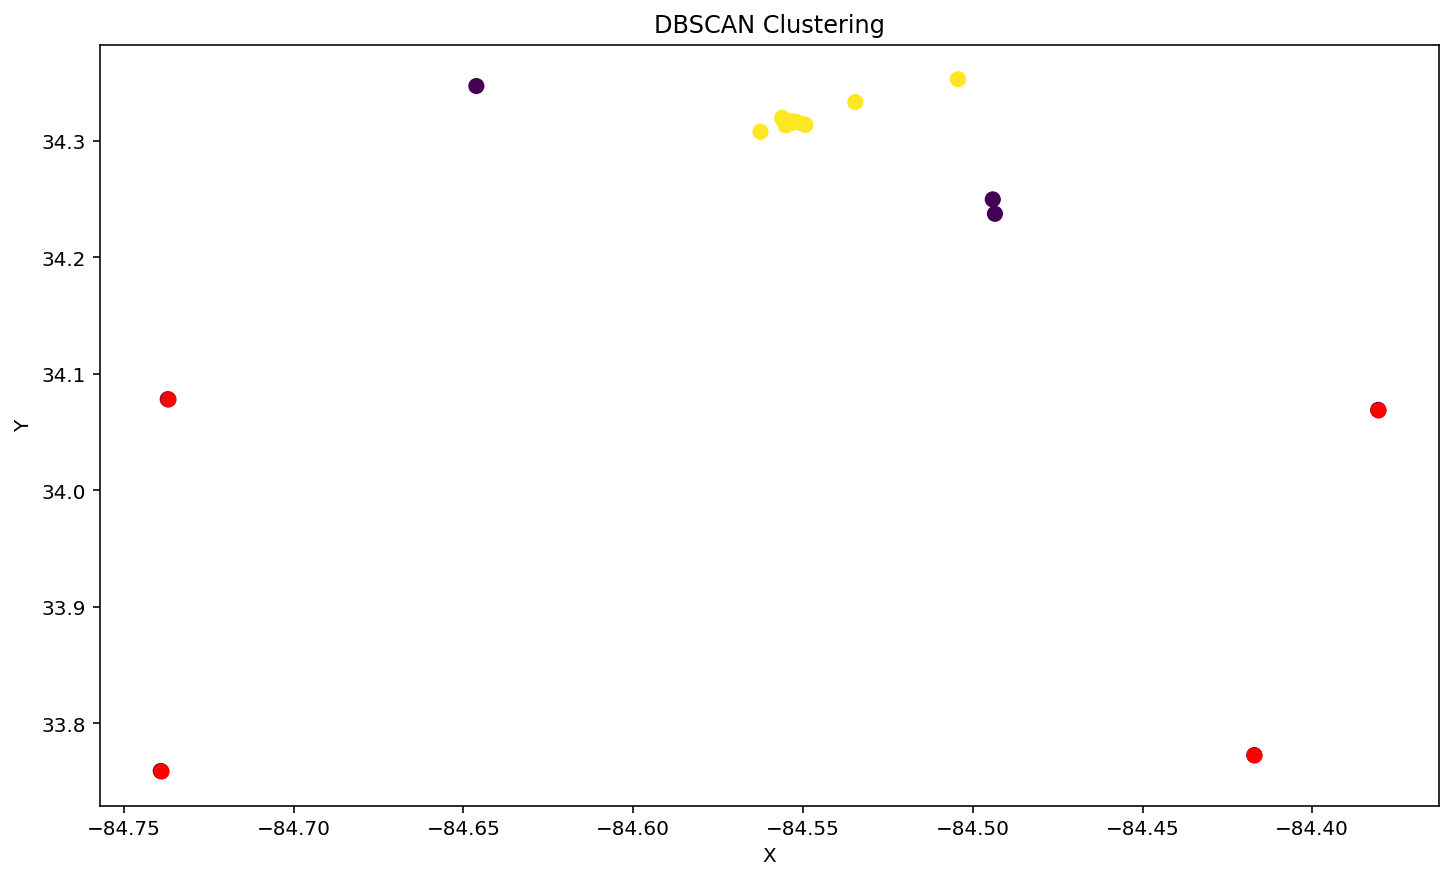

Cluster 0: ['Waleska', 'Cherokee County Sheriff - Waleska Precinct', 'Cherokee County Fire Station 12 - Waleska', 'Waleska Super Mart', 'Waleska Woods Road', 'Waleska Food Mart', 'Waleska Post Office', 'Waleska United Methodist Church', 'Waleska Animal Hospital', 'Waleska City Hall', 'Waleska Church of God of Prophecy', 'Waleska First Baptist Church', 'Waleska']
Cluster -1: ['Waleska Highway', 'Waleska Street', 'Waleska Road']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

class Clustering:
    def cluster_and_process(self, data, eps, cleaned):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(data)
        db = DBSCAN(eps=eps, min_samples=5)
        labels = db.fit_predict(X_scaled)
        clusters_dict = {}
        for i, label in enumerate(labels):
            try:
                node_name = cleaned.iloc[i]['Name']
            except:
                continue
            if label not in clusters_dict:
                clusters_dict[label] = []
            clusters_dict[label].append(node_name)

        return labels, clusters_dict
    
    def cluster(self, csv,phrase,epsilon):
        df = pd.read_csv(csv)
        cleaned = df[df['Name'].str.contains(phrase)]
        cleaned = cleaned[~((cleaned['Label'] == 11) & (cleaned.duplicated(subset=['Name', 'Label'])))]
        X = cleaned[['X', 'Y']].values
        additional_points = np.array([[34.078195, -84.737098],
                                      [33.759108, -84.739158],
                                      [33.772771, -84.417076],
                                      [34.069045, -84.380571]])
        X = np.concatenate((X, additional_points), axis=0)
        additional_df = pd.DataFrame(additional_points, columns=['X', 'Y'])
        df = pd.concat([df, additional_df], ignore_index=True)
        labels, clusters_dict = self.cluster_and_process(X, epsilon, cleaned)
        plt.scatter(X[:, 1], X[:, 0], c=labels, cmap='viridis', s=50)  # X and Y switched
        plt.scatter(additional_points[:, 1], additional_points[:, 0], color='red', s=50)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('DBSCAN Clustering')
        plt.show()
        for cluster_label, names in clusters_dict.items():
            print(f"Cluster {cluster_label}: {names}")

Clustering().cluster("CleanedDataCherokee.csv","Waleska",0.4)

In [162]:
print(len(cleaned))
#Austell 10: ~0.7-0.8
#Akers Mill 8: ~0.15
#Clarkdake 9: 0.2
#Powder Springs 13: 0.45



13
